In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/items-orders/Orders data.xlsx
/kaggle/input/items-orders/Associated_Item_data.csv
/kaggle/input/customerbehavior-data-unorg/Customer_Behavior_Data.csv


In [2]:
data = pd.read_csv(r'/kaggle/input/customerbehavior-data-unorg/Customer_Behavior_Data.csv')

In [3]:
data

,customer_id,Total Orders,Total Order Days,Average Orders Placed,Total Order Value,Average Order Value,Average Order Gap Days,Order Consistency Score
0,5235,106.0,90.0,1.177778,1052898.0,9933.000000,1.790476,0.704750
1,7622,14.0,12.0,1.166667,48627.0,3473.357143,4.923077,0.197731
2,3827,8.0,8.0,1.000000,414750.0,51843.750000,18.714286,0.093425
3,2223,231.0,142.0,1.626761,1345798.0,5825.965368,0.830435,1.043287
4,6903,52.0,49.0,1.061224,89588.0,1722.846154,2.392157,0.492475
...,...,...,...,...,...,...,...,...
4156,1222,1.0,1.0,1.000000,41850.0,41850.000000,0.000000,0.000000
4157,7309,1.0,1.0,1.000000,7350.0,7350.000000,0.000000,0.000000
4158,7840,1.0,1.0,1.000000,16510.0,16510.000000,0.000000,0.000000
4159,2486,1.0,1.0,1.000000,2397.0,2397.000000,0.000000,0.000000


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
data_with_id = data['customer_id']
data = data.drop('customer_id', axis=1)
data

,Total Orders,Total Order Days,Average Orders Placed,Total Order Value,Average Order Value,Average Order Gap Days,Order Consistency Score
0,106.0,90.0,1.177778,1052898.0,9933.000000,1.790476,0.704750
1,14.0,12.0,1.166667,48627.0,3473.357143,4.923077,0.197731
2,8.0,8.0,1.000000,414750.0,51843.750000,18.714286,0.093425
3,231.0,142.0,1.626761,1345798.0,5825.965368,0.830435,1.043287
4,52.0,49.0,1.061224,89588.0,1722.846154,2.392157,0.492475
...,...,...,...,...,...,...,...
4156,1.0,1.0,1.000000,41850.0,41850.000000,0.000000,0.000000
4157,1.0,1.0,1.000000,7350.0,7350.000000,0.000000,0.000000
4158,1.0,1.0,1.000000,16510.0,16510.000000,0.000000,0.000000
4159,1.0,1.0,1.000000,2397.0,2397.000000,0.000000,0.000000


In [6]:
data['Average Order Gap Days'].mean()

12.944053653196065

In [7]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
data = pd.DataFrame(scaled_data.fit_transform(data))
data

,0,1,2,3,4,5,6
0,4.180930,3.959272,0.924194,1.562106,-0.230621,-0.725101,-0.048969
1,-0.068885,-0.117909,0.838915,-0.339649,-0.422895,-0.521448,-0.049072
2,-0.346047,-0.326996,-0.440267,0.353666,1.016869,0.375126,-0.049093
3,9.955136,6.677393,4.370180,2.116761,-0.352869,-0.787513,-0.048899
4,1.686473,1.816138,0.029636,-0.262082,-0.475000,-0.685985,-0.049012
...,...,...,...,...,...,...,...
4156,-0.669403,-0.692897,-0.440267,-0.352482,0.719401,-0.841500,-0.049113
4157,-0.669403,-0.692897,-0.440267,-0.417814,-0.307505,-0.841500,-0.049113
4158,-0.669403,-0.692897,-0.440267,-0.400468,-0.034854,-0.841500,-0.049113
4159,-0.669403,-0.692897,-0.440267,-0.427193,-0.454933,-0.841500,-0.049113


In [8]:
data_combined = pd.concat([data_with_id, data], axis=1)
data_combined

,customer_id,0,1,2,3,4,5,6
0,5235,4.180930,3.959272,0.924194,1.562106,-0.230621,-0.725101,-0.048969
1,7622,-0.068885,-0.117909,0.838915,-0.339649,-0.422895,-0.521448,-0.049072
2,3827,-0.346047,-0.326996,-0.440267,0.353666,1.016869,0.375126,-0.049093
3,2223,9.955136,6.677393,4.370180,2.116761,-0.352869,-0.787513,-0.048899
4,6903,1.686473,1.816138,0.029636,-0.262082,-0.475000,-0.685985,-0.049012
...,...,...,...,...,...,...,...,...
4156,1222,-0.669403,-0.692897,-0.440267,-0.352482,0.719401,-0.841500,-0.049113
4157,7309,-0.669403,-0.692897,-0.440267,-0.417814,-0.307505,-0.841500,-0.049113
4158,7840,-0.669403,-0.692897,-0.440267,-0.400468,-0.034854,-0.841500,-0.049113
4159,2486,-0.669403,-0.692897,-0.440267,-0.427193,-0.454933,-0.841500,-0.049113


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

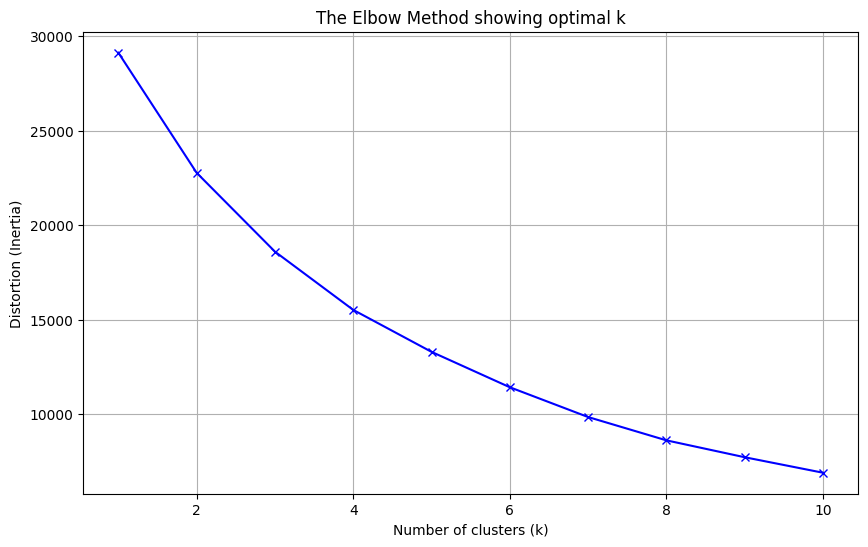

In [9]:
# Calculate distortion for a range of k values
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('The Elbow Method showing optimal k')
plt.grid(True)
plt.show()

>4 number of ideal customer types - elbow method


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.526


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.533


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.522


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.309


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.342


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.344


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.358


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.330


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.350


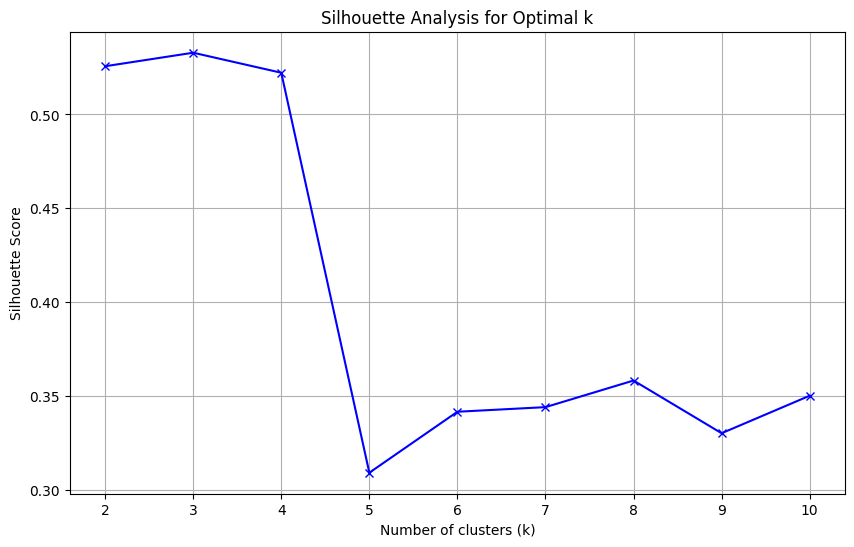

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

In [11]:
optimal_k = 4  # Replace with your determined optimal value
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data)

# Add cluster labels to original dataframe
data_combined['cluster'] = clusters

# Examine cluster sizes
cluster_sizes = data_combined['cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

Cluster sizes:
cluster
0    3570
1     436
2     145
3      10
Name: count, dtype: int64


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

2025-04-16 09:41:20.033586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744796480.267468      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744796480.339985      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
data_combined

,customer_id,0,1,2,3,4,5,6,cluster
0,5235,4.180930,3.959272,0.924194,1.562106,-0.230621,-0.725101,-0.048969,1
1,7622,-0.068885,-0.117909,0.838915,-0.339649,-0.422895,-0.521448,-0.049072,0
2,3827,-0.346047,-0.326996,-0.440267,0.353666,1.016869,0.375126,-0.049093,0
3,2223,9.955136,6.677393,4.370180,2.116761,-0.352869,-0.787513,-0.048899,1
4,6903,1.686473,1.816138,0.029636,-0.262082,-0.475000,-0.685985,-0.049012,1
...,...,...,...,...,...,...,...,...,...
4156,1222,-0.669403,-0.692897,-0.440267,-0.352482,0.719401,-0.841500,-0.049113,0
4157,7309,-0.669403,-0.692897,-0.440267,-0.417814,-0.307505,-0.841500,-0.049113,0
4158,7840,-0.669403,-0.692897,-0.440267,-0.400468,-0.034854,-0.841500,-0.049113,0
4159,2486,-0.669403,-0.692897,-0.440267,-0.427193,-0.454933,-0.841500,-0.049113,0


In [14]:
orders = pd.read_excel(r'/kaggle/input/items-orders/Orders data.xlsx')
orders

,order_date,order_id,order_number,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id
0,2025-04-03,136349,SO/25-26/000818,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,CLOSED,Noida,3
1,2025-01-30,110393,SO/24-25/90881,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,CLOSED,Greater NOIDA,6
2,2025-02-12,116427,SO/24-25/96511,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,CLOSED,Noida,3
3,2024-12-26,96182,SO/24-25/77411,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,CLOSED,Noida,3
4,2024-12-30,97858,SO/24-25/78975,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,CLOSED,Gomti Nagar,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64454,2024-12-26,96152,SO/24-25/77382,948,Maa Bindwa,Utkarsh Pratap Singh,17,1650.00,130.00,1520.0,-60.0,CLOSED,Gomti Nagar,1
64455,2024-12-26,96153,SO/24-25/77392,5822,Yaduvanshi General Store,Raza Rizvi,5602,8255.00,935.00,7320.0,-455.0,CLOSED,Telibagh,2
64456,2024-12-25,96166,SO/24-25/77390,1655,Brijwasi sweet and restaurant (115),Ashutosh Tripathi,37,20970.00,2140.00,18830.0,-195.0,CLOSED,Noida,3
64457,2024-12-26,96173,SO/24-25/77401,4268,Ashutosh Traders,Mohd Yaqoob,4293,3508.00,198.00,3310.0,-30.0,CLOSED,Telibagh,2


In [15]:
reference_date = pd.Timestamp('2025-04-10') - pd.Timedelta(days=14)
print(f"Reference date: {reference_date.strftime('%Y-%m-%d')}")

Reference date: 2025-03-27


In [16]:
feature_start = reference_date - pd.Timedelta(days=13)
feature_end = reference_date
print(feature_start, feature_end)

2025-03-14 00:00:00 2025-03-27 00:00:00


In [17]:
feature_dates = pd.date_range(feature_start, feature_end)
feature_dates

DatetimeIndex(['2025-03-14', '2025-03-15', '2025-03-16', '2025-03-17',
               '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21',
               '2025-03-22', '2025-03-23', '2025-03-24', '2025-03-25',
               '2025-03-26', '2025-03-27'],
              dtype='datetime64[ns]', freq='D')

In [18]:
#Label Matrix
label_start = reference_date + pd.Timedelta(days=1)
label_end = reference_date + pd.Timedelta(days=14)
label_dates = pd.date_range(label_start, label_end)
print(label_start, label_end)

2025-03-28 00:00:00 2025-04-10 00:00:00


In [19]:
customer_ids = orders['customer_id'].unique()

In [20]:
demo_0 = orders.copy()
demo = pd.DataFrame(demo_0.groupby(['customer_id','order_date'])['order_id'].agg('count').reset_index(name = 'order_count'))
demo2 = demo[(demo['order_date'] >= '2025-03-14') & (demo['order_date'] <= '2025-03-27') ]
demo2[demo2['customer_id'] == 5235]
#Checked!

,customer_id,order_date,order_count
34176,5235,2025-03-16,1
34177,5235,2025-03-22,1
34178,5235,2025-03-24,1
34179,5235,2025-03-25,1
34180,5235,2025-03-27,1


In [21]:
feature_matrix = []
customer_list = []

In [22]:
for cust_id in customer_ids:
    # Filter orders for the customer
    cust_orders = orders[orders['customer_id'] == cust_id]
    cust_order_dates = set(cust_orders['order_date'])

    # Create a binary vector for the feature window
    feature_vec = [1 if date in cust_order_dates else 0 for date in feature_dates]
    feature_matrix.append(feature_vec)
    customer_list.append(cust_id)

In [23]:
feature_matrix = np.array(feature_matrix) #Feature Matrix

In [24]:
customer_list = np.array(customer_list)
customer_list

array([5235, 7622, 3827, ..., 7840, 2486, 7851])

In [25]:
feature_matrix

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

>**LABEL MATRIX**

In [26]:
label_matrix = []

In [27]:
for cust_id in customer_list:  # Use the same order as feature matrix
    # Filter orders for the customer
    cust_orders = orders[orders['customer_id'] == cust_id]
    cust_order_dates = set(cust_orders['order_date'])
    
    # Create a binary vector for the label window
    label_vec = [1 if date in cust_order_dates else 0 for date in label_dates]
    label_matrix.append(label_vec)

In [28]:
demo_label = pd.DataFrame(demo_0.groupby(['customer_id','order_date'])['order_id'].agg('count').reset_index(name = 'order_count'))
demo2 = demo[(demo['order_date'] >= '2025-03-28') & (demo['order_date'] <= '2025-04-10') ]
demo2[demo2['customer_id'] == 5235]

,customer_id,order_date,order_count
34181,5235,2025-03-29,1
34182,5235,2025-03-30,1
34183,5235,2025-03-31,1
34184,5235,2025-04-02,1
34185,5235,2025-04-03,2
34186,5235,2025-04-06,1
34187,5235,2025-04-09,1


In [29]:
label_matrix = np.array(label_matrix)
label_matrix

array([[0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
combined_data = {}
for i, cust_id in enumerate(customer_list):
    combined_data[cust_id] = {
        'features': feature_matrix[i],
        'labels': label_matrix[i]
    }
combined_data = pd.DataFrame(combined_data)
combined_data

,5235,7622,3827,2223,6903,2296,7912,3310,6769,3463,...,7572,7492,7491,7218,7192,1222,7309,7840,2486,7851
features,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
labels,"[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [31]:
data_dict = combined_data.to_dict()

In [32]:
rows = []
for cust_id, feat_lab in data_dict.items():
    features = feat_lab['features']
    labels = feat_lab['labels']
    row = {'customer_id': cust_id}
    # Add features as feature_1, feature_2, ..., feature_14
    for i, val in enumerate(features):
        row[f'feature_{i+1}'] = val
    # Add labels as label_1, label_2, ..., label_14
    for i, val in enumerate(labels):
        row[f'label_{i+1}'] = val
    rows.append(row)

df_long = pd.DataFrame(rows)
df_long

,customer_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12,label_13,label_14
0,5235,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0
1,7622,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3827,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2223,0,0,0,1,0,1,1,1,1,...,0,1,1,0,1,0,1,1,1,1
4,6903,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,1222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4157,7309,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4158,7840,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4159,2486,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y = pd.DataFrame(df_long.iloc[:,15:])
y

,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12,label_13,label_14
0,0,1,1,1,0,1,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,0,1,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4157,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4158,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4159,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
X_sequence = pd.DataFrame(df_long.iloc[:,1:15])
X_sequence

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,0,0,1,0,0,0,0,0,1,0,1,1,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,1,1,0,1,1,1,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4157,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4158,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4159,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
X_static = data_combined.iloc[:,1:]
X_static

,0,1,2,3,4,5,6,cluster
0,4.180930,3.959272,0.924194,1.562106,-0.230621,-0.725101,-0.048969,1
1,-0.068885,-0.117909,0.838915,-0.339649,-0.422895,-0.521448,-0.049072,0
2,-0.346047,-0.326996,-0.440267,0.353666,1.016869,0.375126,-0.049093,0
3,9.955136,6.677393,4.370180,2.116761,-0.352869,-0.787513,-0.048899,1
4,1.686473,1.816138,0.029636,-0.262082,-0.475000,-0.685985,-0.049012,1
...,...,...,...,...,...,...,...,...
4156,-0.669403,-0.692897,-0.440267,-0.352482,0.719401,-0.841500,-0.049113,0
4157,-0.669403,-0.692897,-0.440267,-0.417814,-0.307505,-0.841500,-0.049113,0
4158,-0.669403,-0.692897,-0.440267,-0.400468,-0.034854,-0.841500,-0.049113,0
4159,-0.669403,-0.692897,-0.440267,-0.427193,-0.454933,-0.841500,-0.049113,0


In [36]:
from sklearn.model_selection import train_test_split
X_sequence_train, X_sequence_test, X_static_train, X_static_test, y_train, y_test = train_test_split(
    X_sequence, X_static, y, test_size=0.2, random_state=42)

print(
X_sequence_train.shape,
X_sequence_test.shape,
X_static_train.shape,
X_static_test.shape)

(3328, 14) (833, 14) (3328, 8) (833, 8)


In [37]:
input_length = 14  
output_length = 14  

In [38]:
input_length = 14  # Match your actual sequence length (14 days)
num_static_features = 4  # Match your X_static features count
output_length = 14  # Match your output length (14 days)
vocab_size = 2  # Binary features (0 or 1)

# 3. Build the model
embed_dim = 5
lstm_units = 14

# Define inputs
sequence_input = layers.Input(shape=(input_length,), name='sequence_input')
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(sequence_input)
lstm_layer = layers.LSTM(lstm_units)(embedding_layer)

# Update your model definition to match actual data shape
static_input = layers.Input(shape=(8,), name='static_input')  # Changed from 4 to 8
dense_layer = layers.Dense(10, activation='relu')(static_input)

# Combine sequence and static features
concat = layers.concatenate([lstm_layer, dense_layer])
output = layers.Dense(output_length, activation='sigmoid')(concat)

# Create model
model = models.Model(inputs=[sequence_input, static_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2025-04-16 09:41:52.344663: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ sequence_input            │ (None, 14)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 14, 5)          │             10 │ sequence_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ static_input (InputLayer) │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 14)             │          1,120 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 10)             │             90 │ static_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 24)             │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 14)             │            350 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,570 (6.13 KB)

 Trainable params: 1,570 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# history = model.fit(
#     [X_sequence_train, X_static_train], y_train, 
#     epochs=500, batch_size=8,
#     validation_data=([X_sequence_test, X_static_test], y_test)
# )

In [40]:
# test_predictions = model.predict([X_sequence_test, X_static_test])
# pd.DataFrame(test_predictions)

In [41]:
# print(test_predictions.shape)